<a href="https://colab.research.google.com/github/PanitnanKan/BADS7105-CRM-analysis-and-intelligence/blob/main/Homework%2006/Homework_6_custering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [79]:
df = pd.read_csv('Supermarket Data.csv')
df.dropna(inplace = True)
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
6,200731,20070929,7,18,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237810,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [80]:
total_spend = df.groupby(['CUST_CODE']).sum()["SPEND"]
total_visit = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique()
total_quantity = df.groupby(['CUST_CODE']).sum()["QUANTITY"]
total_spend_list = total_spend.tolist()
total_visit_list = total_visit.tolist()
total_quantity_list = total_quantity.tolist()

In [141]:
cust = df.groupby(['CUST_CODE'], as_index=False).count()
cust['total_spend'] = total_spend_list
cust['total_visit'] = total_visit_list
#cust['total_quantity'] = total_quantity_list
cust = cust.drop(['SHOP_WEEK', 'SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR','QUANTITY','SPEND','PROD_CODE','PROD_CODE_10','PROD_CODE_20', 'PROD_CODE_30','PROD_CODE_40','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE','BASKET_ID','BASKET_SIZE','BASKET_PRICE_SENSITIVITY','BASKET_TYPE','BASKET_DOMINANT_MISSION','STORE_CODE','STORE_FORMAT','STORE_REGION'], axis=1)
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5292 entries, 0 to 5291
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUST_CODE    5292 non-null   object 
 1   total_spend  5292 non-null   float64
 2   total_visit  5292 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 165.4+ KB


,CUST_CODE,total_spend,total_visit
0,CUST0000000369,959.33,220
1,CUST0000001194,2493.83,103
2,CUST0000002257,1.99,1
3,CUST0000002499,0.34,1
4,CUST0000002605,1.80,6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


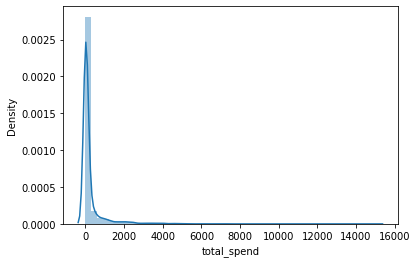

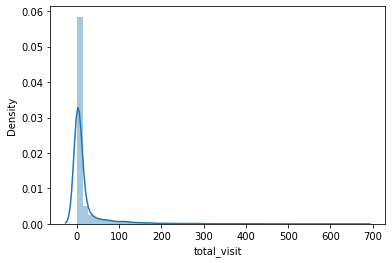

In [142]:
for i, col in enumerate(cust.columns[1:]):
    plt.figure(i)
    sns.distplot(cust[col])
    
plt.show()

In [143]:
cust_std = pd.DataFrame(StandardScaler().fit_transform(cust[cust.columns[1:]]))
cust_std

,0,1
0,1.026366,3.948057
1,3.232520,1.637922
2,-0.350004,-0.376042
3,-0.352376,-0.376042
4,-0.350277,-0.277318
...,...,...
5287,0.653828,1.756390
5288,0.299248,0.196556
5289,-0.201748,-0.178594
5290,0.285719,0.018853


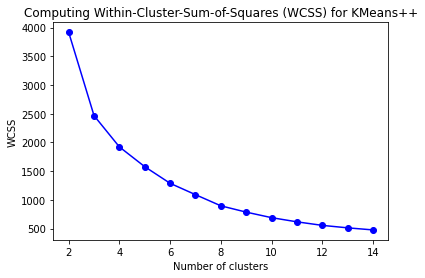

,n,wcss
0,2,9828.765045
1,3,6974.562703
2,4,4670.902104
3,5,2990.424698
4,6,2139.166807
5,7,1638.660164
6,8,1315.242271
7,9,1184.353980
8,10,1072.922601
9,11,981.179112


In [144]:
wcss = []
N = range(2, 15)
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(cust_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS) for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

wcss_detail = pd.DataFrame(ssd, columns=['n', 'wcss'])
wcss_detail

In [148]:
cluster = KMeans(n_clusters=6)
cust['cluster'] = cluster.fit_predict(cust_std)
cust

,CUST_CODE,total_spend,total_visit,cluster
0,CUST0000000369,959.33,220,3
1,CUST0000001194,2493.83,103,3
2,CUST0000002257,1.99,1,0
3,CUST0000002499,0.34,1,0
4,CUST0000002605,1.80,6,0
...,...,...,...,...
5287,CUST0000999569,700.21,109,3
5288,CUST0000999593,453.58,30,2
5289,CUST0000999645,105.11,11,0
5290,CUST0000999935,444.17,21,2


In [149]:
dfCluster = cust.groupby('cluster', as_index=False).mean()
dfCluster['NO_CUST'] = cust[['cluster','CUST_CODE']].groupby('cluster').count()

dfCluster

,cluster,total_spend,total_visit,NO_CUST
0,0,40.423663,4.458965,4423
1,1,3949.098696,170.275362,69
2,2,550.331975,47.741597,476
3,3,1535.121822,116.170543,258
4,4,2290.763793,310.413793,58
5,5,7085.818750,488.375000,8


<Figure size 432x288 with 0 Axes>

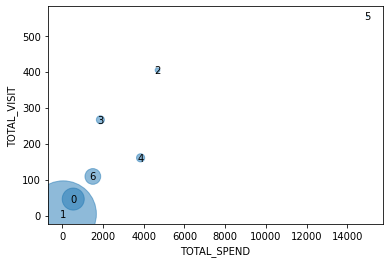

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['total_spend'], dfCluster['total_visit'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("TOTAL_SPEND")
ax.set_ylabel("TOTAL_VISIT")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['total_spend'][i], dfCluster["total_visit"][i]), horizontalalignment='center', verticalalignment='center')

plt.show()